In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Sigmoid function: it squashes the output to a range between 0 and 1**

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

**Cost function: computes the binary cross-entropy loss**

In [ ]:
def compute_cost(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    cost = -(1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

**Gradient Descent: performs updates on weights to minimize the cost**

In [ ]:
def gradient_descent(X, y, weights, learning_rate, epochs):
    m = len(y)
    cost_history = []

    for _ in range(epochs):
        predictions = sigmoid(np.dot(X, weights))
        gradient = (1 / m) * np.dot(X.T, (predictions - y))
        weights -= learning_rate * gradient

        # Store the cost at each iteration
        cost_history.append(compute_cost(X, y, weights))

    return weights, cost_history




**Logistic Regression function**

In [ ]:
def logistic_regression(X, y, learning_rate=0.01, epochs=1000):
    # Add a column of ones for the intercept term (bias)
    X = np.c_[np.ones(X.shape[0]), X]

    # Initialize weights randomly
    weights = np.zeros(X.shape[1])

    # Perform gradient descent
    weights, cost_history = gradient_descent(X, y, weights, learning_rate, epochs)

    return weights, cost_history


**Prediction function using learned weights**

In [ ]:
def predict(X, weights):
    # Add a column of ones for the intercept term (bias)
    X = np.c_[np.ones(X.shape[0]), X]

    # Compute probabilities using sigmoid
    probabilities = sigmoid(np.dot(X, weights))

    # Convert probabilities to binary predictions (0 or 1)
    predictions = (probabilities >= 0.5).astype(int)

    return predictions


Trained Weights: [-0.03044702  0.16748276  0.13703575]
Predictions: [1 1 1 1 1]


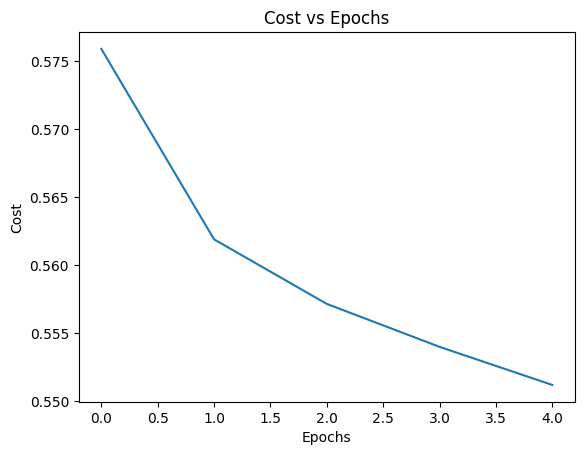

In [ ]:

# Example usage
if __name__ == "__main__":
    # Example data (X: features, y: labels)
    X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
    y = np.array([0, 0, 1, 1, 1])

    # Train logistic regression model
    weights, cost_history = logistic_regression(X, y, learning_rate=0.1, epochs=5)

    print("Trained Weights:", weights)

    # Predictions on the training data
    predictions = predict(X, weights)
    print("Predictions:", predictions)

    # Plot cost over epochs (optional)

    plt.plot(cost_history)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost vs Epochs')
    plt.show()
